# PS2_1

7722877.0
579 1668/7/25


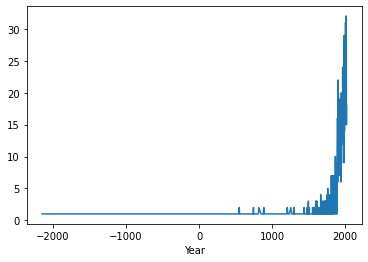

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


Sig_Eqs=pd.read_csv('earthquakes-2021-10-24_16-07-07_+0800.tsv',sep="\t")
D_num=Sig_Eqs["Deaths"].sum()
print(D_num)
Sig_Eqs['Country'].unique()
Sig_Eqs.groupby('Country')['Deaths'].sum().sort_values(axis=0,ascending=False)[0:10]
M=Sig_Eqs[Sig_Eqs['Mag']>6.0]


M_count=M.groupby('Year')['Mag'].count()
M_count.groupby(['Year']).mean().plot()
def CountEq_LargestEq(Country_name):
    Date_Country=Sig_Eqs[(Sig_Eqs['Country']== Country_name)]
    a=Date_Country["Mag"].count()
    Max_num=Date_Country['Mag'].max()
    Max_num_Date=Date_Country[Date_Country['Mag'].isin([Max_num])]
    b=Max_num_Date['Year'].mean().astype(int).astype(str)+'/'+ Max_num_Date['Mo'].mean().astype(int).astype(str)+'/'+ Max_num_Date['Dy'].mean().astype(int).astype(str)
    print(a,b)
CountEq_LargestEq('CHINA')



# PS2_2

C:\Users\ZHAOANG\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ZHAOANG\AppData\Local\Temp/ipykernel_12048/1929218274.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pwind['DATE'] = pd.to_datetime(Pwind['DATE'])
C:\Users\ZHAOANG\AppData\Local\Temp/ipykernel_12048/1929218274.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

<AxesSubplot:xlabel='DATE,DATE'>

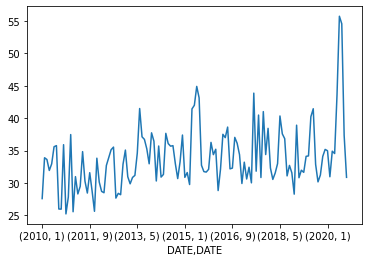

In [2]:
import pandas as pd

DA = pd.read_csv('2281305.csv')
wind = DA.loc[:,('DATE','WND')]
wind[['DA','DQC','TC','SR','SQC']] = wind['WND'].str.split(',',5,expand = True)

Pwind = wind[wind["SQC"].astype('int') == 1]
Pwind['DATE'] = pd.to_datetime(Pwind['DATE'])
Pwind['SR1'] = Pwind['SR'].astype('int')


Pwind.groupby([Pwind['DATE'].dt.year,Pwind['DATE'].dt.month])['SR1'].mean().plot()

# PS2_3

<AxesSubplot:xlabel='Date', ylabel='Discharge of Huaxian'>

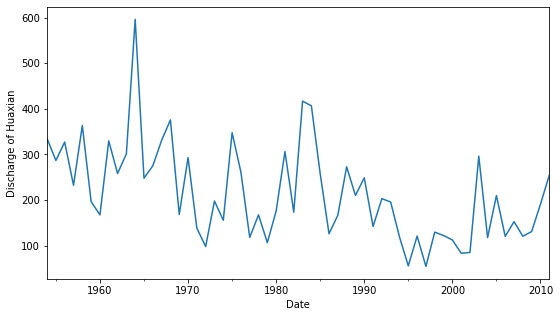

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df_3sites=pd.read_csv('212331.csv')
df_3sites=df_3sites.set_index('time')
df_3sites.index=pd.to_datetime(df_3sites.index)
df_annual=df_3sites['huaxian'].resample('y').mean()
df_annual.plot(xlabel='Date',ylabel='Discharge of Huaxian',figsize=(9,5))